# Trying to to release particles on several days --> timeps


- [ ] Check release time and locations for Sanchi oil spill (Kuroshio)
Sinking: 14th January 2018 (16:45 local time?)
HFO spilled
First island to be impacted was Takarajima, in the very end of January (29-31?). The other island to be badly affected was Amami (and the adjacent southern islands). Contamination affected also Kikaijima and Tokunojima. Other islands, both north and south of this core, were affected, but with low amounts of oil. We can discuss this later on.
All of this can be gathered through news online. There are also papers, but careful with these, there was lots of bad science done regarding trajectory of the oil and impacts.
 
—> exact coords of sinking? 

my estimate from screenshot:
28°25'01.3"N 125°54'24.7"E

28.417036, 125.906860

—> release every 1hr until the 23
<br>
  - [x] need to read arcGIS data sent by duarte (/Users/Gomez023/Documents/postdoc_docs/Projects/WOC_proj/Oil/Duarte_Sanchi_spill/SANCHI_CONFIDENTIAL/) in python!!
<br>

https://desktop.arcgis.com/es/arcmap/latest/analyze/arcpy-mapping/getting-started-with-arcpy-mapping-tutorial.htm 

<br>

http://localhost:8888/notebooks/test_arcgis_data_reading.ipynb 

<br>
            - [x] test with Sanchi data now: 
<br>

                - [x] 
                
http://localhost:8888/notebooks/2022-04-28_test_arcgis_data_reading_Sanchi.ipynb
                
                —> works!!!!!

- [ ] 


In [1]:
#%matplotlib inline
from parcels import Field, FieldSet, ParticleSet, JITParticle,  AdvectionRK4, ErrorCode, DiffusionUniformKh
import numpy as np
from datetime import timedelta, datetime
import xarray as xr

import pytz
from netCDF4 import num2date, date2num

In [2]:
data_path_v02 = '/storage/shared/oceanparcels/output_data/data_LauraGN/WOC/v02_current_data/separate_componets/KUR/'
fname_v02 = 'runconv15m_kur2_d24*.nc' 

In [3]:
ds = xr.open_mfdataset(data_path_v02 + fname_v02)

In [4]:
ds.lon.data.min()

120.0

In [5]:
ds.lon.data.max()

140.0

## Total vel. is:
# (ds.UG_CMEMS[0,:,:] + ds.U[0,:,:])

In [6]:
!pwd

/storage/home/gomez023/WOC_ESA/Oil_spills/v02/Kuroshio/Plots


In [7]:
outdir =  "/storage/home/gomez023/WOC_ESA/Oil_spills/v02/Kuroshio/"
file_name = "test02_v02_KUR_Jan2018_cont1h_MESH.nc"

In [8]:
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import colors 

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [9]:
ds = xr.open_dataset(outdir + file_name)

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


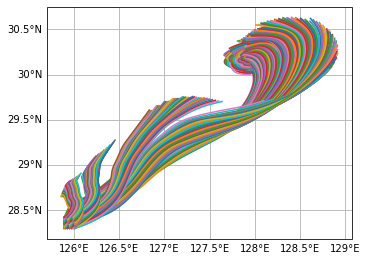

In [10]:
plt.figure(figsize=(12,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([6, 12])
# ax1.set_ylim([52, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# --> looks good!

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


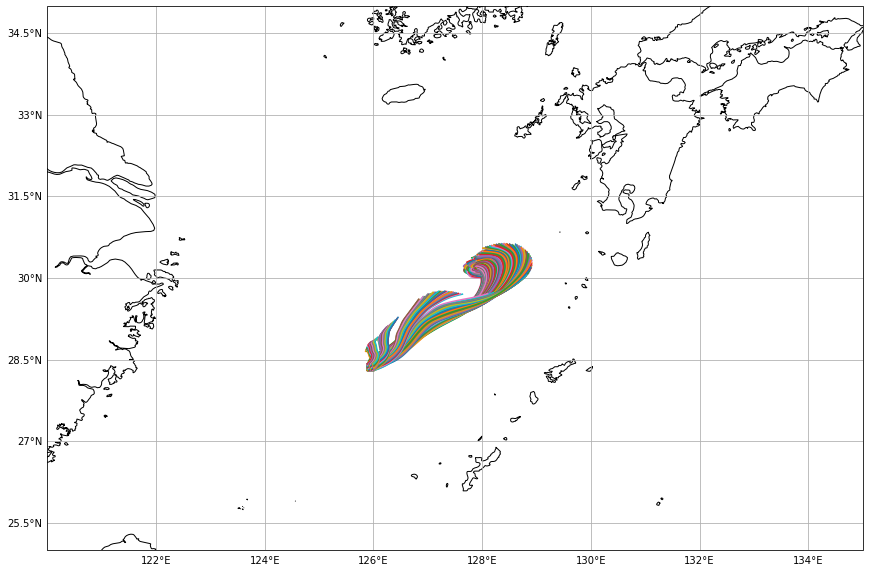

In [49]:
plt.figure(figsize=(16,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([120, 135])
ax1.set_ylim([25, 35])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

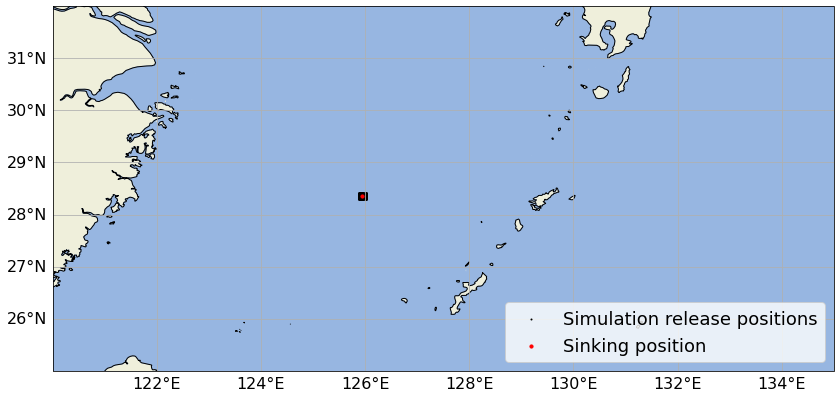

In [50]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')

ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
ax1.add_feature(cartopy.feature.BORDERS)#, linestyle=':')
ax1.add_feature(cartopy.feature.OCEAN)
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
# ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds['lon'][:,0], ds['lat'][:,0], c='k', s=1, transform=ccrs.PlateCarree(), label = 'Simulation release positions') #marker='o'
ax1.scatter(125.95, 28.36, c='r', s=10, transform=ccrs.PlateCarree(), label='Sinking position')
ax1.set_xlim([120, 135])
ax1.set_ylim([25, 32])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.legend(loc=4, fontsize=18)
gl.xlabel_style = {'size': 16} #, 'color': 'gray'}
gl.ylabel_style = {'size': 16} #{'color': 'red', 'weight': 'bold'}


In [53]:
ds

<xarray.Dataset>
Dimensions:     (traj: 490, obs: 385)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float32 ...
    lon         (traj, obs) float32 ...
    z           (traj, obs) float32 ...
Attributes: (12/57)
    feature_type:                  trajectory
    Conventions:                   CF-1.7, ACDD-1.3, ISO 8601
    ncei_template_version:         NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:               2.3.1.dev20+g92f2fb90
    parcels_mesh:                  spherical
    Metadata_Conventions:          Climate and Forecast (CF) 1.7, Attribute C...
    ...                            ...
    date_modified:                 2022-05-06T12:23:53
    source:                        parcels
    source_version:                2.3.1.dev20+g92f2fb90
    history:                       2022-05-06T12:23:53 - Creation
    input:                         WOC-L4-CUReul-KUR-1H: runconv15m_kur2_d24*.nc
    processing_software:           parcels

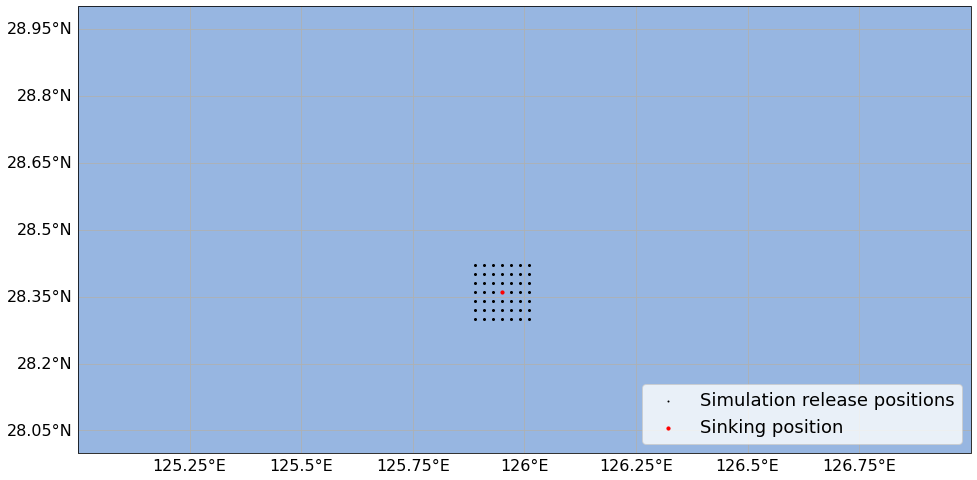

In [54]:
plt.figure(figsize=(16,16)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='10m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
# ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
ax1.add_feature(cartopy.feature.OCEAN)
ax1.scatter(ds['lon'][:,0], ds['lat'][:,0], c='k', s=1, transform=ccrs.PlateCarree(), label = 'Simulation release positions') #marker='o'
ax1.scatter(125.95, 28.36, c='r', s=10, transform=ccrs.PlateCarree(), label='Sinking position')
ax1.set_xlim([125, 127])
ax1.set_ylim([28., 29])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.legend(loc=4, fontsize=18)
gl.xlabel_style = {'size': 16} #, 'color': 'gray'}
gl.ylabel_style = {'size': 16} #{'color': 'red', 'weight': 'bold'}
ax1.add_feature(cartopy.feature.OCEAN)

https://stackoverflow.com/questions/55303911/add-polygon-box-to-cartopy-python

In [12]:
import cartopy
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections import namedtuple
from shapely.geometry.polygon import LinearRing

In [13]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

region = Region(
    region_name="all_region",
    lonmin = 120.,
    lonmax = 135.,
    latmin = 25.,
    latmax = 32.,
)

sub_region =  Region(
        region_name="sub_region",
        lonmin=125,
        lonmax=127,
        latmin=28.,
        latmax=29.
)



In [14]:
def add_sub_region_box(ax, subregion):
    """ """
    geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)
    ax.add_geometries([geom], crs=cartopy.crs.PlateCarree(), alpha=0.3)

    return ax

Text(120.3, 31.128611, 'Shanghai')

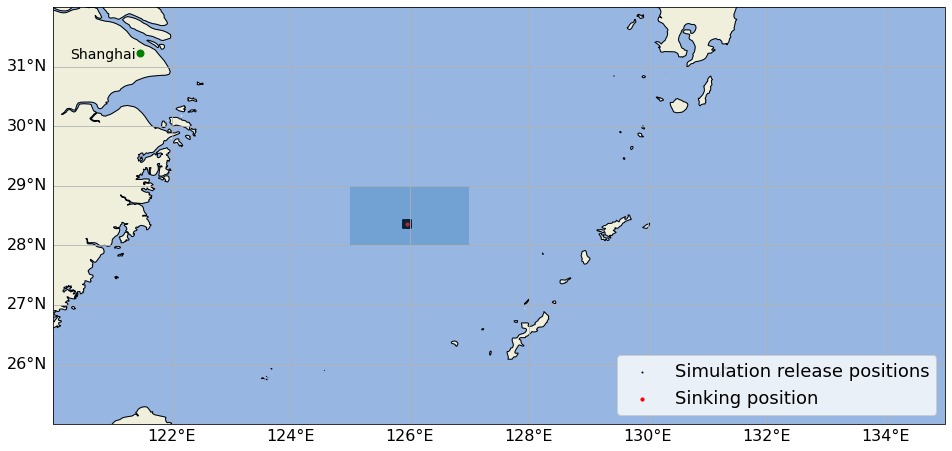

In [16]:
sha = [31.228611, 121.474722]

plt.figure(figsize=(16,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')

ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
ax1.add_feature(cartopy.feature.BORDERS)#, linestyle=':')
ax1.add_feature(cartopy.feature.OCEAN)
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
# ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds['lon'][:,0], ds['lat'][:,0], c='k', s=1, transform=ccrs.PlateCarree(), label = 'Simulation release positions') #marker='o'
ax1.scatter(125.95, 28.36, c='r', s=10, transform=ccrs.PlateCarree(), label='Sinking position')
ax1.set_xlim([120, 135])
ax1.set_ylim([25, 32])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels= False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.legend(loc=4, fontsize=18)
gl.xlabel_style = {'size': 16} #, 'color': 'gray'}
gl.ylabel_style = {'size': 16} #{'color': 'red', 'weight': 'bold'}

add_sub_region_box(ax1, sub_region)

ax1.plot(sha[1], sha[0], 'go', markersize=7, transform=ccrs.PlateCarree()) #Geodetic())
ax1.text(120.3, sha[0]-.1, 'Shanghai', c='k', transform=ccrs.PlateCarree(), size=14)

# plt.savefig(, dpi=300)

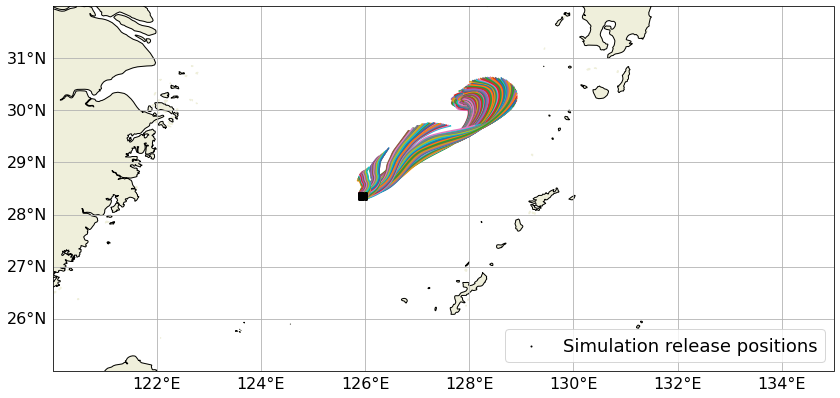

In [9]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')

ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
ax1.add_feature(cartopy.feature.BORDERS)#, linestyle=':')
# ax1.add_feature(cartopy.feature.OCEAN)
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
# ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds['lon'][:,0], ds['lat'][:,0], c='k', s=1, transform=ccrs.PlateCarree(), label = 'Simulation release positions', zorder=500) #marker='o'
ax1.set_xlim([120, 135])
ax1.set_ylim([25, 32])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.legend(loc=4, fontsize=18)
gl.xlabel_style = {'size': 16} #, 'color': 'gray'}
gl.ylabel_style = {'size': 16} #{'color': 'red', 'weight': 'bold'}

plt.savefig('Kur_v02_oil_spills_trajs_01.png', dpi=300)



In [16]:
# mark a known place to help us geo-locate ourselves
tak = [29.133333, 129.2]
ama = [28.266667, 129.35] #lat, lon
sha = [31.228611, 121.474722]

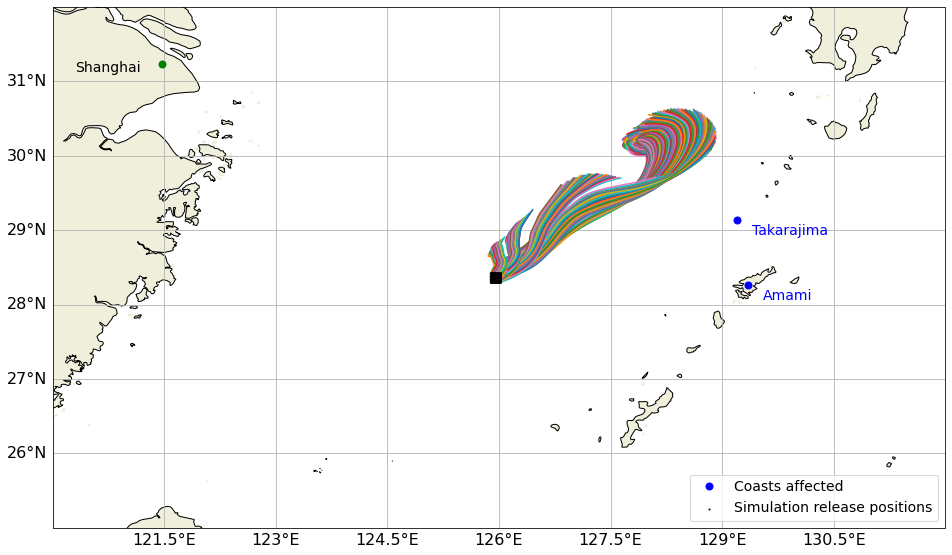

In [17]:
plt.figure(figsize=(16,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
ax1.plot(ds['lon'].T, ds['lat'].T, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds['lon'][:,0], ds['lat'][:,0], c='k', s=1, transform=ccrs.PlateCarree(), label = 'Simulation release positions', zorder=500) #marker='o'

ax1.set_xlim([120, 132])
ax1.set_ylim([25, 32])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16} #, 'color': 'gray'}
gl.ylabel_style = {'size': 16} #{'color': 'red', 'weight': 'bold'}

ax1.plot(tak[1], tak[0], 'bo', markersize=7, transform=ccrs.PlateCarree()) #Geodetic())
ax1.text(tak[1]+.2, tak[0]-.2, 'Takarajima', c='b', transform=ccrs.PlateCarree(), size=14)

ax1.plot(ama[1], ama[0], 'bo', markersize=7, transform=ccrs.PlateCarree(), label='Coasts affected') #Geodetic())
ax1.text(ama[1]+.2, ama[0]-.2, 'Amami', c='b', transform=ccrs.PlateCarree(), size=14)

ax1.plot(sha[1], sha[0], 'go', markersize=7, transform=ccrs.PlateCarree()) #Geodetic())
ax1.text(120.3, sha[0]-.1, 'Shanghai', c='k', transform=ccrs.PlateCarree(), size=14)
ax1.legend(loc=4, fontsize=14)

In [18]:
# Oil release location approx:
# 125.95E, 28.36N

# --> we do mesh (min lon to max lon 13km, so more than first rossby radius to take into account structures present not exactly on at same position!)

ref_lon = 125.95
ref_lat = 28.36

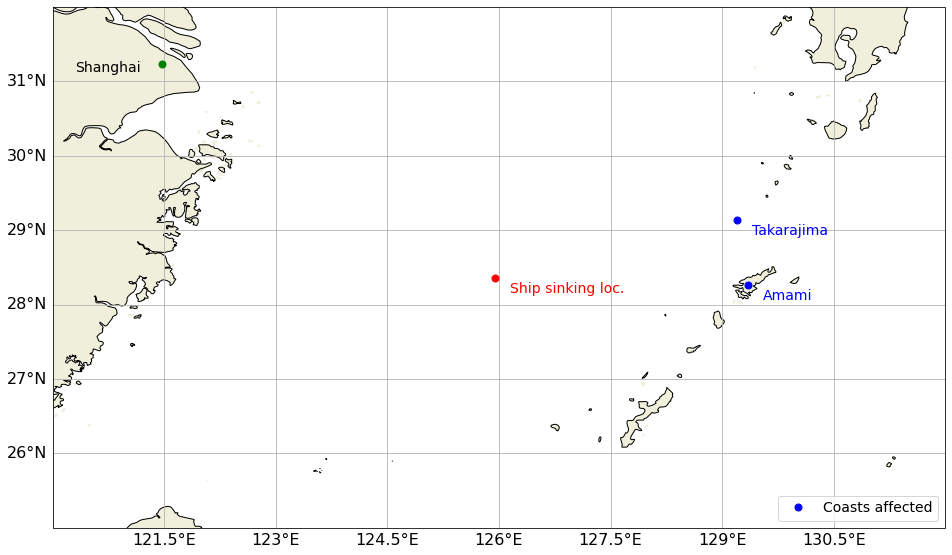

In [20]:
plt.figure(figsize=(16,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.set_xlim([120, 132])
ax1.set_ylim([25, 32])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16} #, 'color': 'gray'}
gl.ylabel_style = {'size': 16} #{'color': 'red', 'weight': 'bold'}

#
ax1.plot(ref_lon, ref_lat, 'ro', markersize=7, transform=ccrs.PlateCarree()) #Geodetic())
ax1.text(ref_lon+.2, ref_lat-.2, 'Ship sinking loc.', c='r', transform=ccrs.PlateCarree(), size=14)

#

ax1.plot(tak[1], tak[0], 'bo', markersize=7, transform=ccrs.PlateCarree()) #Geodetic())
ax1.text(tak[1]+.2, tak[0]-.2, 'Takarajima', c='b', transform=ccrs.PlateCarree(), size=14)

ax1.plot(ama[1], ama[0], 'bo', markersize=7, transform=ccrs.PlateCarree(), label='Coasts affected') #Geodetic())
ax1.text(ama[1]+.2, ama[0]-.2, 'Amami', c='b', transform=ccrs.PlateCarree(), size=14)

ax1.plot(sha[1], sha[0], 'go', markersize=7, transform=ccrs.PlateCarree()) #Geodetic())
ax1.text(120.3, sha[0]-.1, 'Shanghai', c='k', transform=ccrs.PlateCarree(), size=14)
ax1.legend(loc=4, fontsize=14)

plt.savefig('Kur_v02_oil_spills_start_end_points.png', dpi=300)


In [39]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [40]:
import earthpy

ModuleNotFoundError: No module named 'earthpy'